# Day 13: Transparent Origami

## Part 1:

You reach another volcanically active part of the cave. It would be nice if you could do some kind of thermal imaging so you could tell ahead of time which caves are too hot to safely enter.

Fortunately, the submarine seems to be equipped with a thermal camera! When you activate it, you are greeted with:

Congratulations on your purchase! To activate this infrared thermal imaging
camera system, please enter the code found on page 1 of the manual.
Apparently, the Elves have never used this feature. To your surprise, you manage to find the manual; as you go to open it, page 1 falls out. It's a large sheet of transparent paper! The transparent paper is marked with random dots and includes instructions on how to fold it up (your puzzle input). For example:
```
6,10
0,14
9,10
0,3
10,4
4,11
6,0
6,12
4,1
0,13
10,12
3,4
3,0
8,4
1,10
2,14
8,10
9,0

fold along y=7
fold along x=5
```

The first section is a list of dots on the transparent paper. 0,0 represents the top-left coordinate. The first value, x, increases to the right. The second value, y, increases downward. So, the coordinate 3,0 is to the right of 0,0, and the coordinate 0,7 is below 0,0. The coordinates in this example form the following pattern, where `#` is a dot on the paper and `.` is an empty, unmarked position:
```
...#..#..#.
....#......
...........
#..........
...#....#.#
...........
...........
...........
...........
...........
.#....#.##.
....#......
......#...#
#..........
#.#........
```

Then, there is a list of fold instructions. Each instruction indicates a line on the transparent paper and wants you to fold the paper up (for horizontal y=... lines) or left (for vertical x=... lines). In this example, the first fold instruction is fold along y=7, which designates the line formed by all of the positions where y is 7 (marked here with -):
```
...#..#..#.
....#......
...........
#..........
...#....#.#
...........
...........
-----------
...........
...........
.#....#.##.
....#......
......#...#
#..........
#.#........
```

Because this is a horizontal line, fold the bottom half up. Some of the dots might end up overlapping after the fold is complete, but dots will never appear exactly on a fold line. The result of doing this fold looks like this:
```
#.##..#..#.
#...#......
......#...#
#...#......
.#.#..#.###
...........
...........
```

Now, only 17 dots are visible.

Notice, for example, the two dots in the bottom left corner before the transparent paper is folded; after the fold is complete, those dots appear in the top left corner (at 0,0 and 0,1). Because the paper is transparent, the dot just below them in the result (at 0,3) remains visible, as it can be seen through the transparent paper.

Also notice that some dots can end up overlapping; in this case, the dots merge together and become a single dot.

The second fold instruction is fold along x=5, which indicates this line:
```
#.##.|#..#.
#...#|.....
.....|#...#
#...#|.....
.#.#.|#.###
.....|.....
.....|.....
```

Because this is a vertical line, fold left:
```
#####
#...#
#...#
#...#
#####
.....
.....
```

The instructions made a square!

The transparent paper is pretty big, so for now, focus on just completing the first fold. After the first fold in the example above, 17 dots are visible - dots that end up overlapping after the fold is completed count as a single dot.

**How many dots are visible after completing just the first fold instruction on your transparent paper?**

In [1]:
# Get test input
with open('./test_input_13.txt') as f:
    lines = f.readlines()
test_input = [line.strip() for line in lines]
test_input

['6,10',
 '0,14',
 '9,10',
 '0,3',
 '10,4',
 '4,11',
 '6,0',
 '6,12',
 '4,1',
 '0,13',
 '10,12',
 '3,4',
 '3,0',
 '8,4',
 '1,10',
 '2,14',
 '8,10',
 '9,0',
 '',
 'fold along y=7',
 'fold along x=5']

In [2]:
# Get full input
with open('./input_13.txt') as f:
    lines = f.readlines()
full_input = [line.strip() for line in lines]
full_input

['1257,728',
 '889,756',
 '601,166',
 '124,284',
 '120,806',
 '850,827',
 '488,572',
 '584,250',
 '109,877',
 '726,868',
 '522,515',
 '542,51',
 '520,830',
 '323,865',
 '132,379',
 '700,579',
 '45,584',
 '1265,472',
 '298,385',
 '656,746',
 '206,141',
 '803,171',
 '1102,355',
 '661,653',
 '937,794',
 '421,532',
 '284,305',
 '527,697',
 '825,229',
 '649,618',
 '577,707',
 '1151,421',
 '261,331',
 '667,294',
 '1268,200',
 '1173,542',
 '1011,166',
 '174,780',
 '325,675',
 '1129,586',
 '519,280',
 '202,60',
 '139,575',
 '619,869',
 '346,634',
 '191,616',
 '1108,364',
 '822,460',
 '700,217',
 '644,444',
 '323,477',
 '455,417',
 '803,422',
 '534,274',
 '485,450',
 '1022,99',
 '446,579',
 '77,735',
 '1009,128',
 '609,870',
 '350,539',
 '739,812',
 '1064,96',
 '467,101',
 '353,240',
 '281,100',
 '589,492',
 '139,240',
 '295,287',
 '1007,654',
 '540,481',
 '1039,729',
 '179,395',
 '212,887',
 '774,245',
 '900,114',
 '45,136',
 '433,339',
 '925,462',
 '913,446',
 '584,868',
 '1001,439',
 '261,21

When a fold is made, reset the coordinate system:
 - Anything above the fold is now positive (fold - original_coord)
 - Anything below is negative

Then, take the absolute value of each new coord and replot on a smaller grid.

In [6]:
coords = []
folds = []
for line in test_input:
    if ',' in line:
        coords.append([int(num) for num in line.split(',')])
    elif line=='':
        continue
    else:
        folds.append(line[-3:])

In [7]:
coords

[[6, 10],
 [0, 14],
 [9, 10],
 [0, 3],
 [10, 4],
 [4, 11],
 [6, 0],
 [6, 12],
 [4, 1],
 [0, 13],
 [10, 12],
 [3, 4],
 [3, 0],
 [8, 4],
 [1, 10],
 [2, 14],
 [8, 10],
 [9, 0]]

In [8]:
folds

['y=7', 'x=5']

In [10]:
import numpy as np

In [11]:
np.max(coords)

14

In [25]:
x = set()
x.add(1)
x.add(2)
x.add((1, 2))
x.add([3, 4])
x

TypeError: unhashable type: 'list'

In [18]:
y = (0, 1)
y[1]

1

In [126]:
def get_fold(line):
    temp = line.split(' ')
    return temp[-1].split('=')

def fold_direction(fold):
    return 0 if fold[0]=='x' else 1

def get_new_coord(coord, fold_dir, fold_size):
    new_coord = [0, 0]
    if coord[fold_dir]>fold_size:
        new_coord[fold_dir] = coord[fold_dir] - 2*(coord[fold_dir]-fold_size)
    else:
        new_coord[fold_dir] = coord[fold_dir]
    new_coord[1-fold_dir] = coord[1-fold_dir]
    return tuple(new_coord)

def p1_solution(input_text):
    coords = []
    folds = []
    for line in input_text:
        if ',' in line:
            coords.append([int(num) for num in line.split(',')])
        elif line=='':
            continue
        else:
            folds.append(get_fold(line))
    
    fold_dir = fold_direction(folds[0])
    fold_size = int(folds[0][1])
    
    visible_dots = set()
    for coord in coords:
        new_coord = get_new_coord(coord, fold_dir, fold_size)
        visible_dots.add(tuple(new_coord))
    display(visible_dots)
    return len(visible_dots)

In [127]:
p1_solution(test_input)
# 17

{(0, 0),
 (0, 1),
 (0, 3),
 (1, 4),
 (2, 0),
 (3, 0),
 (3, 4),
 (4, 1),
 (4, 3),
 (6, 0),
 (6, 2),
 (6, 4),
 (8, 4),
 (9, 0),
 (9, 4),
 (10, 2),
 (10, 4)}

17

In [128]:
p1_solution(full_input)

{(0, 535),
 (0, 820),
 (1, 219),
 (1, 675),
 (5, 170),
 (5, 276),
 (5, 617),
 (5, 618),
 (10, 93),
 (10, 444),
 (10, 450),
 (10, 562),
 (11, 189),
 (11, 600),
 (13, 452),
 (15, 697),
 (16, 789),
 (17, 567),
 (21, 285),
 (22, 336),
 (23, 302),
 (23, 464),
 (23, 592),
 (23, 750),
 (25, 227),
 (25, 318),
 (25, 667),
 (26, 532),
 (28, 45),
 (28, 421),
 (28, 473),
 (28, 849),
 (30, 110),
 (30, 122),
 (30, 772),
 (30, 784),
 (32, 889),
 (38, 99),
 (42, 194),
 (42, 200),
 (42, 562),
 (44, 75),
 (44, 91),
 (44, 117),
 (44, 217),
 (45, 24),
 (45, 136),
 (45, 198),
 (45, 346),
 (45, 373),
 (45, 472),
 (45, 548),
 (45, 584),
 (45, 794),
 (45, 821),
 (47, 63),
 (53, 728),
 (55, 837),
 (57, 54),
 (59, 497),
 (63, 616),
 (64, 61),
 (64, 180),
 (65, 23),
 (69, 222),
 (69, 296),
 (69, 672),
 (70, 203),
 (70, 579),
 (70, 644),
 (70, 651),
 (77, 159),
 (77, 735),
 (80, 397),
 (80, 845),
 (82, 114),
 (82, 266),
 (85, 128),
 (85, 318),
 (85, 576),
 (85, 766),
 (87, 84),
 (87, 892),
 (92, 239),
 (92, 743),

689

First try with `full_input` gave `823`, which is apparently too high!

Took an inordinate amount of time debugging to finally realize that there wasn't an error with my algorithm to reassign points--the error was in how I parsed the folding instructions!!! It was originally built only for simple 1-digit folds (`'x=5'`), but broke with longer folding amounts (`'x=655'`). Oy

## Part 2:

Finish folding the transparent paper according to the instructions. The manual says the code is always eight capital letters.

What code do you use to activate the infrared thermal imaging camera system?

In [129]:
def get_fold(line):
    temp = line.split(' ')
    return temp[-1].split('=')

def fold_direction(fold):
    return 0 if fold[0]=='x' else 1

def get_new_coord(coord, fold_dir, fold_size):
    new_coord = [0, 0]
    if coord[fold_dir]>fold_size:
        new_coord[fold_dir] = coord[fold_dir] - 2*(coord[fold_dir]-fold_size)
    else:
        new_coord[fold_dir] = coord[fold_dir]
    new_coord[1-fold_dir] = coord[1-fold_dir]
    return tuple(new_coord)

def fold_paper(coords, fold_dir, fold_size):
    visible_dots = set()
    for coord in coords:
        new_coord = get_new_coord(coord, fold_dir, fold_size)
        visible_dots.add(tuple(new_coord))
    return visible_dots
    
def p2_solution(input_text):
    coords = []
    folds = []
    for line in input_text:
        if ',' in line:
            coords.append([int(num) for num in line.split(',')])
        elif line=='':
            continue
        else:
            folds.append(get_fold(line))

    for fold in folds:
        fold_dir = fold_direction(fold)
        fold_size = int(fold[1])

        coords = fold_paper(coords, fold_dir, fold_size)
    
    return coords

In [130]:
p2_solution(test_input)

{(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 0),
 (1, 4),
 (2, 0),
 (2, 4),
 (3, 0),
 (3, 4),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4)}

In [131]:
import matplotlib.pyplot as plt

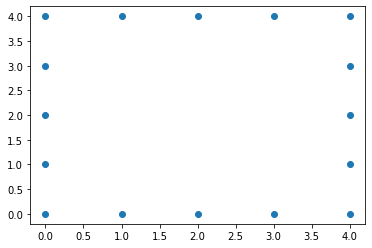

In [132]:
coords = p2_solution(test_input)
plt.scatter(x=[c[0] for c in coords], y=[c[1] for c in coords])

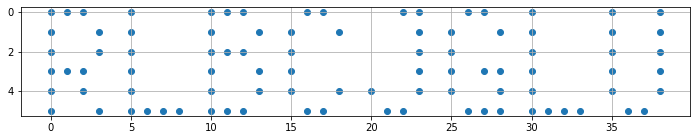

In [144]:
coords = p2_solution(full_input)
fig, ax = plt.subplots(figsize=(12, 2))
ax.scatter(x=[c[0] for c in coords], y=[c[1] for c in coords])
plt.grid(visible=True)
plt.gca().invert_yaxis()

Coolest solution to AoC yet!!!